In [ ]:
# 📊 Securities-Based Lending (SBL) Risk Model-SUPERNOVA
# This is a Mini Project to Simulate SBL Loan Eligibility Based on Portfolio Risk

#In this notebook, I simulate data for more than 100 clients who hold a variety of stock assets.
#Each client applies for a loan using their investment portfolio as collateral which is what they do using supernova's platform.

#I calculated key financial indicators like Loan-to-Value (LTV) and average volatility to
#determine whether a client is eligible for a loan under simplified risk rules,
#similar to the logic used by SBL platforms like Supernova Technology.


In [ ]:
#Here at STAGE1 i am Loading libraries for:

#Data manipulation (pandas)
#Numerical computation (numpy)
#Visualization (matplotlib & seaborn)
#np.random.seed(42) ensures consistent results every time you run the code.
# I'm performing financial security data research and analysis These are the core tools I'll use daily as a data analyst for working with SBL data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)


In [ ]:
#STAGE2- I Am simulating the portfolio data here by creating different tickers per client

#Calculating market_value, total_portfolio_value
#Assigning a loan_requested amount based on portfolio size


In [23]:
#client IDs
clients = [f'C{i:03d}' for i in range(1, 101)]
tickers = ['AAPL', 'TSLA', 'GOOG', 'AMZN', 'NVDA', 'MSFT']
volatility = {'AAPL': 0.25, 'TSLA': 0.6, 'GOOG': 0.2, 'AMZN': 0.3, 'NVDA': 0.5, 'MSFT': 0.2}
prices = {'AAPL': 190, 'TSLA': 270, 'GOOG': 140, 'AMZN': 130, 'NVDA': 490, 'MSFT': 330}
portfolio = []

#stocks to each client and calculating the  total value
for client in clients:
    holdings = np.random.choice(tickers, size=np.random.randint(3, 6), replace=False)
    client_total = 0
    rows = []

    for ticker in holdings:
        qty = np.random.randint(10, 100)
        price = prices[ticker]
        val = qty * price
        client_total += val
        rows.append({
            'client_id': client,
            'ticker': ticker,
            'quantity': qty,
            'price': price,
            'market_value': val,
            'volatility_score': volatility[ticker],
            'asset_type': 'Stock'
        })

#setting up loan amount between 30–70% of portfolio value
    loan_requested = client_total * np.random.uniform(0.3, 0.7)

    for row in rows:
        row['total_portfolio_value'] = client_total
        row['loan_requested'] = loan_requested
        portfolio.append(row)
df = pd.DataFrame(portfolio)
df.to_csv('portfolio_data.csv', index=False)
df.head(100)


,client_id,ticker,quantity,price,market_value,volatility_score,asset_type,total_portfolio_value,loan_requested
0,C001,GOOG,40,140,5600,0.20,Stock,78130,39136.515435
1,C001,NVDA,56,490,27440,0.50,Stock,78130,39136.515435
2,C001,AMZN,97,130,12610,0.30,Stock,78130,39136.515435
3,C001,MSFT,61,330,20130,0.20,Stock,78130,39136.515435
4,C001,AAPL,65,190,12350,0.25,Stock,78130,39136.515435
...,...,...,...,...,...,...,...,...,...
95,C025,AMZN,55,130,7150,0.30,Stock,41180,18182.969315
96,C025,MSFT,73,330,24090,0.20,Stock,41180,18182.969315
97,C026,AMZN,35,130,4550,0.30,Stock,36110,15002.892334
98,C026,TSLA,38,270,10260,0.60,Stock,36110,15002.892334


In [ ]:
 #STAGE3

#Calculating Risk Metrics & Loan Eligibility

#lets say a client has 100,000$ worth stocks and he request for 80,000$loan
# based on his portfolio as collateral. well the ltv is 80% which is 0.8% which is risky.based on this we can decline his approval on the other side
# we should also cosider waether the volatility of the stocks are minimal or not. for example tesla stocks are more volatile compare to MSFT
# which is why we need to consider the volatility of stocks before approving the loans even he raised for 50,000$ loan amount. we shouldn't approve it
# without checking his stocks if he has 100,000$ of stocks only related to tesla then it might go all the way down and might crash because they are
# volatile and risky in the market, so we shouldn't approve blindly even the LTV ratio is less without looking at volatility)
# Thats the reason i also Included a volatility_score for each asset set to <=3.5 and ltv to <=0.5 and used operator- AND(&) condition,that anyone one of
#them became false they wont be eligible for loans.


In [24]:
grouped = df.groupby('client_id').agg({
    'total_portfolio_value': 'first',
    'loan_requested': 'first'
}).reset_index()

#LTV
grouped['LTV'] = grouped['loan_requested'] / grouped['total_portfolio_value']

#average volatility
vol_scores = df.groupby('client_id')['volatility_score'].mean().reset_index()
grouped = grouped.merge(vol_scores, on='client_id')

# Applying risk rules:
# Eligible condition
grouped['eligibility'] = np.where(
    (grouped['LTV'] <= 0.5) & (grouped['volatility_score'] <= 0.35),
    'Eligible', 'Not Eligible'
)

grouped.head(25)


,client_id,total_portfolio_value,loan_requested,LTV,volatility_score,eligibility
0,C001,78130,39136.515435,0.500915,0.290000,Not Eligible
1,C002,25740,15095.779753,0.586472,0.350000,Not Eligible
2,C003,47510,19724.814432,0.415172,0.310000,Eligible
3,C004,104420,64326.255123,0.616034,0.350000,Not Eligible
4,C005,33940,11597.256811,0.341699,0.300000,Eligible
5,C006,39180,13707.713540,0.349865,0.383333,Not Eligible
6,C007,72560,31496.764742,0.434079,0.433333,Not Eligible
7,C008,35850,23990.249724,0.669184,0.233333,Not Eligible
8,C009,74490,39558.121704,0.531053,0.290000,Not Eligible
9,C010,49100,24848.011122,0.506069,0.325000,Not Eligible


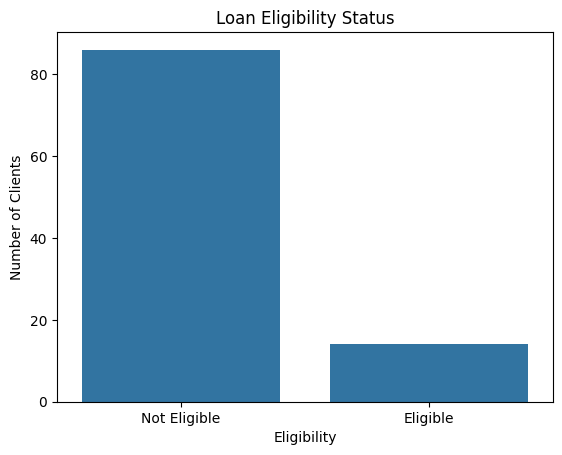

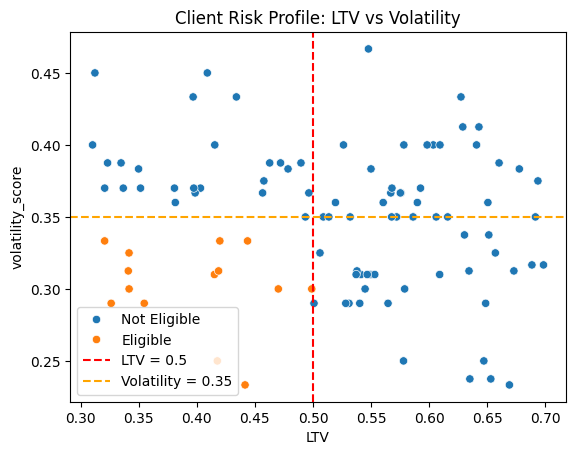

In [25]:
# Countplot of Eligible vs Not Eligible
sns.countplot(x='eligibility', data=grouped)
plt.title("Loan Eligibility Status")
plt.xlabel("Eligibility")
plt.ylabel("Number of Clients")
plt.show()

# Risk profile scatter plot (LTV vs Volatility)
sns.scatterplot(x='LTV', y='volatility_score', hue='eligibility', data=grouped)
plt.axvline(0.5, color='red', linestyle='--', label='LTV = 0.5')
plt.axhline(0.35, color='orange', linestyle='--', label='Volatility = 0.35')
plt.title("Client Risk Profile: LTV vs Volatility")
plt.legend()
plt.show()


In [ ]:
#SUMMARY

#This project was my attempt to replicate what a Data Analyst might do at Supernova from client data onboarding
#and validation to simple rule-based suitability modeling and risk profiling.
#I designed everything to reflect what your job description outlined: working with portfolio data, calculating eligibility using LTV and volatility,
#and preparing insights that help product and risk teams refine models. I’d be excited to take this further
#with real data, back-testing, and pipeline improvements.”

